In [1]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline
#%matplotlib

C:\Python\python-3.6.2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


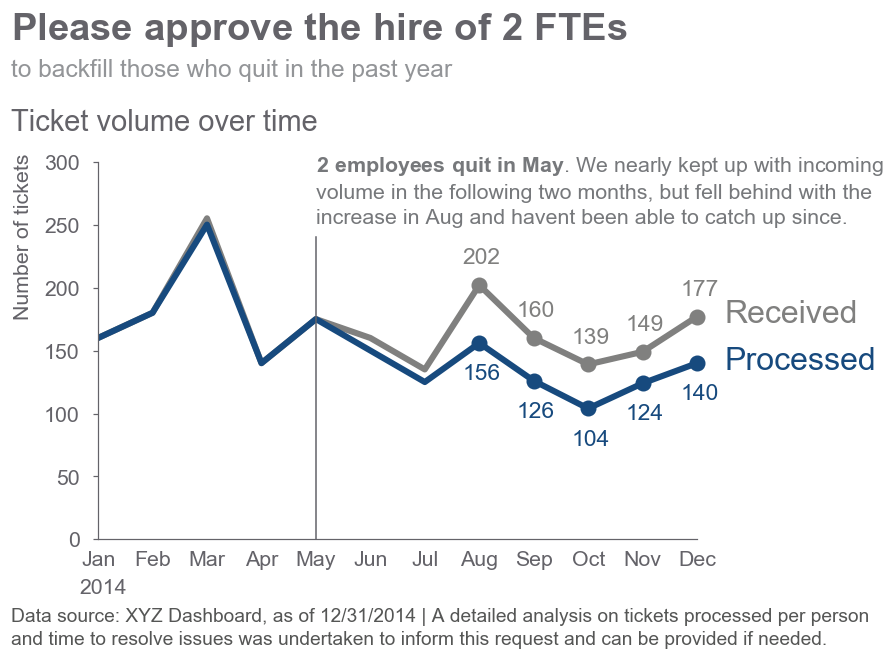

In [2]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

# number of tickets per month
X = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# processed
Y = [160, 180, 250, 140, 175, 150, 125, 156, 126, 104, 124, 140]
# received
Z = [160, 180, 255, 140, 175, 160, 135, 202, 160, 139, 149, 177]

# Battleship Grey (footnote)
color_gray1 = '#555655'
# Rolling Stone
color_gray2 = '#76787B'
# Friar Gray
color_gray3 = '#80807F'
# Smoky gray
color_gray4 = '#646369'
# Oslo Gray
color_gray5 = '#939598'
# Chathams Blue
color_blue1 = '#174A7E'

# create new figure
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), # width, height in inches 
                        dpi=110)             # resolution of the figure

# set the data limits for the y-axis and x-axis
ax1.set_xlim([0, 11])
ax1.set_ylim([0, 300])

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)

# draw received tickets line with markers
ax1.plot(range(12), Z, linewidth=4, color=color_gray3)
ax1.scatter(range(12)[-5:], Z[-5:], s=90, color=color_gray3, clip_on=False)

# draw processed tickets line with markers
ax1.plot(range(12), Y, linewidth=4, color=color_blue1)
ax1.scatter(range(12)[-5:], Y[-5:], s=90, color=color_blue1, clip_on=False)

# add vertical reference line
plt.axvline(x=4, ymax=0.8, color='#636369', linewidth=1)

# annotate received
for i, v in enumerate(Z[-5:]):
    ax1.annotate(str(v), 
                 (i+7, v),                    # (x,y) point to annotate
                 xytext=(-11, 14),            # (x,y) to place the text at
                 textcoords='offset points',  # offset (in points) from the xy value
                 color=color_gray3, 
                 fontsize=15)

# annotate proccessed
for i, v in enumerate(Y[-5:]):
    ax1.annotate(str(v), 
                 (i+7, v),                   # (x,y) point to annotate
                 xytext=(-11, -24),          # (x,y) to place the text at
                 textcoords='offset points', # offset (in points) from the xy value
                 color=color_blue1, 
                 fontsize=15)

# label lines directly
ax1.text(11.5, 172, 'Received', fontsize='21', color=color_gray3)
ax1.text(11.5, 135, 'Processed', fontsize='21', color=color_blue1)

# set properties for axes object
xticks = list(range(12))
yticks = list(range(0, 350, 50))
plt.setp(ax1, 
         xticks=xticks, 
         xticklabels=X,
         yticks=yticks)

# change the appearance of ticks, tick labels, and gridlines 
ax1.tick_params(bottom='off')

# remove chart right and bottom borders
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# configure x, y tick labels appearance
for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(14) 
    i.set_color(color_gray4) 

# shift y tick labels slightly left
for item in ax1.get_yticklabels():
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# change ticks and spines colors
ax1.tick_params(color=color_gray4)
ax1.spines['bottom'].set_color(color_gray4)
ax1.spines['left'].set_color(color_gray4)

# title the axis
ax1.text(-1.6, 325, 'Ticket volume over time', fontsize=19, color=color_gray4)
ax1.text(-1.55, 295, 'Number of tickets', fontsize=14, rotation='vertical', color=color_gray4)
ax1.text(-0.34, -43, '2014', fontsize=14, color=color_gray4)

# add more informative text
ax1.text(4, 252, 
         '$\\bf{2\ employees\ quit\ in\ May}$. We nearly kept up with incoming\n'
         'volume in the following two months, but fell behind with the\n'
         'increase in Aug and haven''t been able to catch up since.', 
         fontsize=14, color=color_gray2, linespacing=1.4)

# title the plot
ax1.text(-1.6, 397, '$\\bf{Please\ approve\ the\ hire\ of\ 2\ FTEs}$', fontsize=25, color=color_gray4)
ax1.text(-1.6, 368, 'to backfill those who quit in the past year', fontsize=16, color=color_gray5)

# add footnote to the plot with data sources description
ax1.text(-1.6, -83, 
         'Data source: XYZ Dashboard, as of 12/31/2014 | A detailed analysis on tickets processed per person\n'
         'and time to resolve issues was undertaken to inform this request and can be provided if needed.', 
         fontsize=12.5, color=color_gray1, linespacing=1.3)
